# Projet sur l'expérence de vie dans le monde

## Importation des librairies 

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


## Chargement des données

In [334]:
df = pd.read_csv("Cleaned-Life-Exp.csv" , index_col = 0)

## Analyse exploratoire 

In [ ]:
#### Vue d'ensemble sur le dataset

In [337]:
df.head().transpose()

Country,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan
Year,1.621762,1.404986,1.188210,0.971434,0.754658
Status,-0.459399,-0.459399,-0.459399,-0.459399,-0.459399
Life expectancy,-0.443691,-0.979279,-0.979279,-1.021286,-1.052791
Adult Mortality,0.790238,0.854614,0.830473,0.862660,0.886801
infant deaths,0.268824,0.285786,0.302749,0.328193,0.345155
Alcohol,-1.133571,-1.133571,-1.133571,-1.133571,-1.133571
percentage expenditure,-0.335570,-0.334441,-0.334594,-0.332096,-0.367862
Hepatitis B,-0.635971,-0.755661,-0.675868,-0.556178,-0.516281
Measles,-0.110384,-0.168124,-0.173531,0.032045,0.051757
BMI,-0.959116,-0.984066,-1.009015,-1.033964,-1.053924


In [339]:
### Ensemble de colonne dans le dateset

In [74]:
df.columns

Index(['Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
#### Ensemble d'index

In [9]:
df["Country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [ ]:
#### Nombre de pays dans le dataset

In [11]:
df["Country"].nunique()

193

In [ ]:
#### Information générale sur le dataset

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   float64
 2   Status                           2938 non-null   float64
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   float64
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   float64
 10  BMI                              2938 non-null   float64
 11  under-five deaths                2938 non-null   float64
 12  Polio               

In [ ]:
#### Concernant les valeurs manquantes

In [ ]:
df.isnull().sum()

In [ ]:
#### Les valeurs abérantes

In [ ]:
for col in df.columns:
    iqr = np.quantile(df[col], q = [0.25, 0.75])
    limite_basse = iqr[0] - 1.5*(iqr[1] - iqr[0])
    limite_sup = iqr[1] + 1.5*(iqr[1] - iqr[0])
    print(f"la colonne {col} a pour valeur inferieur est {limite_basse} et la valeur superieur est {limite_sup}")

In [ ]:
score = {}
for num in df.columns:
    score[num] = df[(df[num] < limite_basse) | (df[num] > limite_sup)][num].tolist()


In [ ]:
for key,val in score.items():
    print(f" La Cle {key} et le nombre de valeur aberantes {len(val)}")

In [33]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.369453e-14,1.000170,-1.629878,-0.762774,0.104330,0.971434,1.621762
Status,2938.0,1.233413e-16,1.000170,-0.459399,-0.459399,-0.459399,-0.459399,2.176759
Life expectancy,2938.0,1.284142e-04,0.999561,-3.457687,-0.643224,0.301932,0.677369,2.076724
Adult Mortality,2938.0,-3.753395e-04,0.998839,-1.318060,-0.730634,-0.167348,0.506583,4.491830
infant deaths,2938.0,0.000000e+00,1.000170,-0.257017,-0.257017,-0.231573,-0.070428,15.009326
Alcohol,2938.0,-1.962432e-02,0.985558,-1.767049,-0.899100,-0.240113,0.729856,3.274483
percentage expenditure,2938.0,5.320606e-17,1.000170,-0.371433,-0.369076,-0.338774,-0.149286,9.429403
Hepatitis B,2938.0,-1.070416e-01,1.007555,-3.189357,-0.396359,0.311926,0.600825,0.804604
Measles,2938.0,2.902149e-17,1.000170,-0.211036,-0.211036,-0.209553,-0.179615,18.295468
BMI,2938.0,-1.204857e-02,1.002242,-1.862284,-0.957869,0.233464,0.887138,2.443979


## 1. Les facteurs prédictifs sélectionnés ont-ils un impact significatif sur l’espérance de vie et quelles sont les variables les plus influentes ?


### Un modèl de regression linéaire pour l'impact significatif et un modèl de randomForest pour l'influence des variables

In [91]:
# Variables explicatives et cible
X =df.drop(["Life expectancy"], axis = 1)
y = df['Life expectancy']

# Séparer en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle de régression linéaire
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)
print("Erreur quadratique moyenne - Régression linéaire:", mean_squared_error(y_test, y_pred_lr))

# Modèle Random Forest pour importance des variables
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
feature_importance = rf_reg.feature_importances_
print("Importance des variables:", dict(zip(X.columns, feature_importance)))

Erreur quadratique moyenne - Régression linéaire: 0.14853274051578064
Importance des variables: {'Year': 0.005204298495909559, 'Status': 0.000239284391732858, 'Adult Mortality': 0.10713305108219161, 'infant deaths': 0.003082737344627054, 'Alcohol': 0.00699206585457169, 'percentage expenditure': 0.0032931988130771627, 'Hepatitis B': 0.0024071754644662876, 'Measles': 0.0024281992531576496, 'BMI': 0.01041895253942065, 'under-five deaths': 0.004544195751455012, 'Polio': 0.0032360922585276445, 'Total expenditure': 0.005754651715027274, 'Diphtheria': 0.002430879196630103, 'HIV/AIDS': 0.38356575802847337, 'GDP': 0.003527145809455267, 'Population': 0.003263209277554854, 'thinness  1-19 years': 0.003814759398750187, 'thinness 5-9 years': 0.00857200193753947, 'Income composition of resources': 0.4314112762930302, 'Schooling': 0.008681067094401985}


### Parmis tout les facteurs predictifs selectionner ont un impact significatif sur l'espérance de vie car le MSE est faible ce qui sous-entend que le modele est bien precis.

### En ce qui concerne les variables les plus influents il n'y à que tois à savoir 'HIV/AIDS avec un taux de 38.36%, Income composition of resources avec un taux de 43.14% sans oublié Adult Mortality avec un taux de 10.71%

## 2.Les pays où l’espérance de vie est plus faible (inférieure à 65 ans) devraient-ils augmenter leurs dépenses de santé pour améliorer la durée de vie de leur population ?

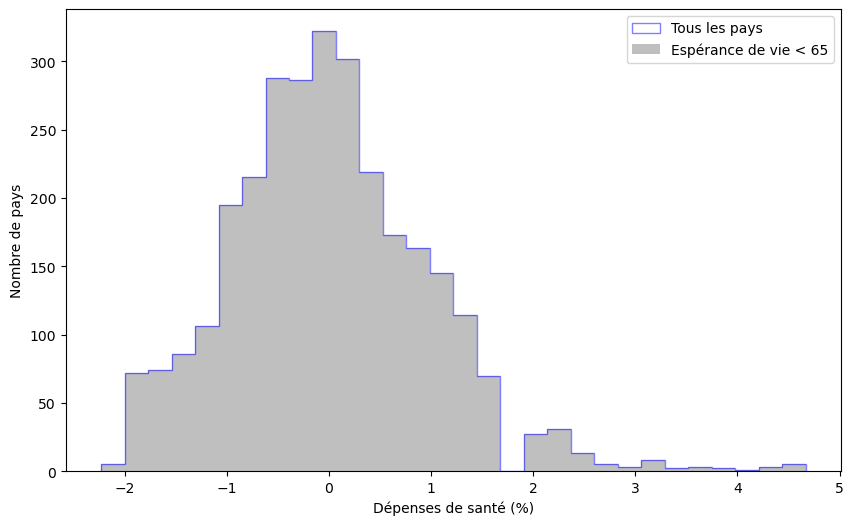

In [143]:
# Filtrer les pays avec espérance de vie < 65
pays_esp_inf_65 = df[df['Life expectancy'] < 65]

# Comparaison des dépenses de santé
plt.figure(figsize=(10, 6))
plt.hist(df['Total expenditure'], bins=30, alpha=0.5, label='Tous les pays', color = "b", histtype ="step")
plt.hist(pays_esp_inf_65['Total expenditure'], bins=30, alpha=0.5, label='Espérance de vie < 65',color = "gray")
plt.xlabel('Dépenses de santé (%)')
plt.ylabel('Nombre de pays')
plt.legend()
plt.show()


#### Pays avec une espérance de vie inférieure à 65 ans : Ces pays sont représentés en couleur gris, et leur distribution est assez similaire à celle de l’ensemble des pays, mais semble légèrement plus concentrée autour de la moyenne et sur les valeurs négatives.
#### Cela suggère que les pays avec une espérance de vie inférieure à 65 ans ne dépensent généralement pas beaucoup en santé, et une proportion notable a même des dépenses de santé inférieures à la moyenne. 
#### En conclusion :  Une augmentation des dépenses de santé pourrait potentiellement améliorer l’espérance de vie dans ces pays, car ils sont sous-représentés dans les classes de dépenses de santé plus élevées.

In [216]:
df.Status.unique()

array([-0.45939851,  2.17675935])

## 3.Comment les taux de mortalité infantile et adulte influencent-ils l’espérance de vie dans les différentes régions ?


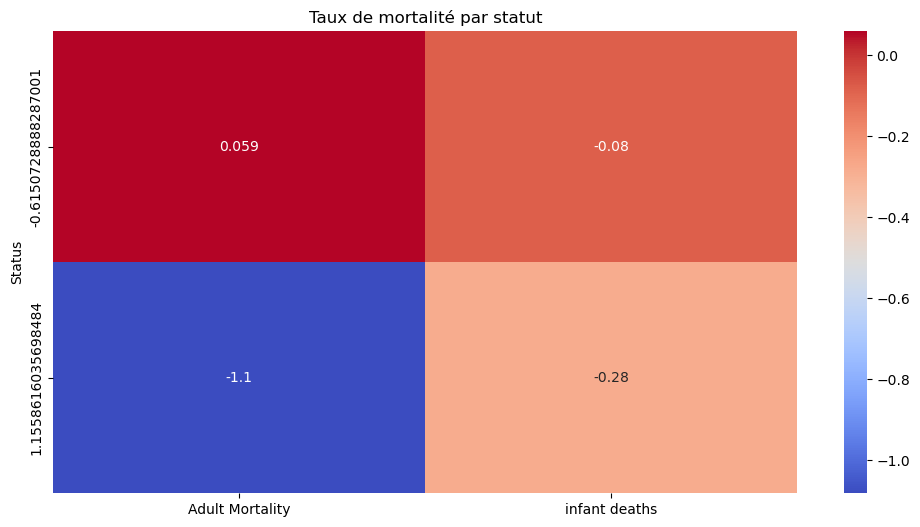

In [328]:
# Créer une carte de chaleur de la mortalité infantile et adulte par région
plt.figure(figsize=(12, 6))
sns.heatmap(df.groupby('Status')[['Adult Mortality', 'infant deaths']].mean(), annot=True, cmap="coolwarm")
plt.title("Taux de mortalité par statut")
plt.show()

### La corrélation entre le statut -0.45 et Adult Mortality est positive (0.14).
### La corrélation entre le même statut et Infant Deaths est légèrement positive (0.052).
### Pour le statut 2.17, la corrélation avec Adult Mortality est fortement négative (-0.68).
### Pour Infant Deaths, elle est aussi négative, mais moins prononcée (-0.24).

## 4. Quelle est la relation entre l’espérance de vie et les facteurs liés au mode de vie tels que la consommation d’alcool ?

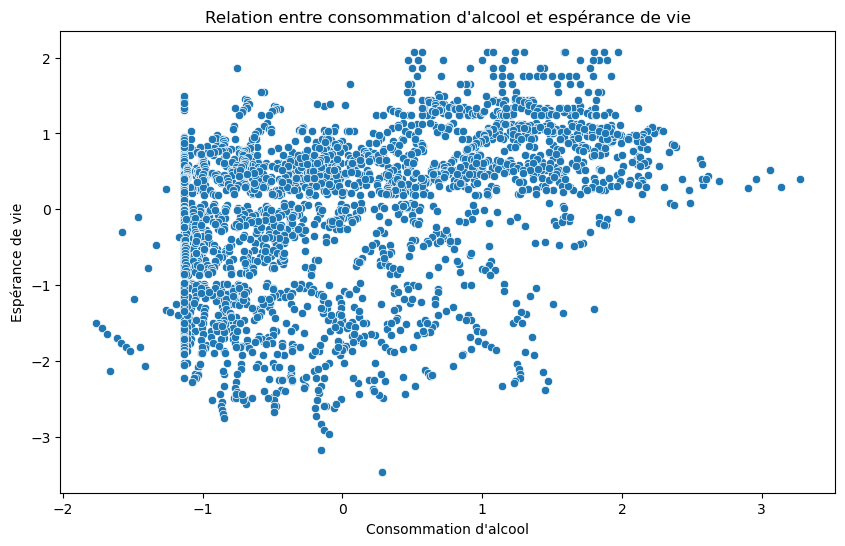

In [341]:
# Nuage de points entre alcool et espérance de vie
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Alcohol'], y=df['Life expectancy'])
plt.xlabel('Consommation d\'alcool')
plt.ylabel('Espérance de vie')
plt.title('Relation entre consommation d\'alcool et espérance de vie')
plt.show()


#### Ce type de graphique est souvent utilisé pour visualiser la distribution et la relation entre deux variables continues, permettant d'identifier des motifs, des regroupements ou des corrélations. Ici, les points semblent dispersés, mais on peut observer une tendance générale de regroupement vers le centre, ce qui pourrait indiquer une relation non linéaire ou une distribution étalée sur plusieurs directions.

## 5. Comment le niveau d’éducation, mesuré en années de scolarité, affecte-t-il la durée de vie humaine ?


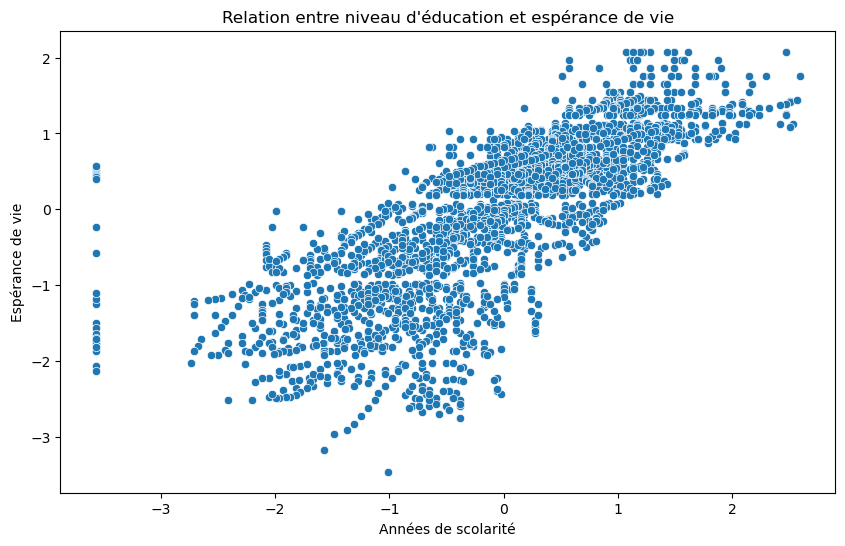

In [347]:
# Nuage de points entre scolarité et espérance de vie
plt.figure(figsize=(10, 6), dpi = 100)
sns.scatterplot(x=df['Schooling'], y=df['Life expectancy'])
plt.xlabel('Années de scolarité')
plt.ylabel('Espérance de vie')
plt.title('Relation entre niveau d\'éducation et espérance de vie')
plt.show()


### Il semble y avoir une corrélation positive entre le niveau d'éducation et l'espérance de vie. Autrement dit, plus les années de scolarité augmentent, plus l'espérance de vie tend également à augmenter.
### La tendance générale suggère que l'éducation pourrait être un facteur associé à une meilleure espérance de vie.
### La distribution des points autour de la droite de tendance montre une certaine dispersion, ce qui indique que d'autres facteurs influencent probablement également l'espérance de vie en dehors de l'éducation.

## 6. Y a-t-il une corrélation positive ou négative entre la consommation d’alcool et l’espérance de vie ?


In [163]:
# Calcul de la corrélation
correlation = df['Alcohol'].corr(df['Life expectancy'])
print("Corrélation entre la consommation d'alcool et l'espérance de vie:", correlation)

Corrélation entre la consommation d'alcool et l'espérance de vie: 0.41454749311993444


In [ ]:
### Il y à une correélation positive entre la consommation d'alcool et l'espérance de vie

## 7. Quel est l’impact de la couverture vaccinale sur l’espérance de vie, en particulier en ce qui concerne des maladies comme l’hépatite B, la poliomyélite et la diphtérie ?

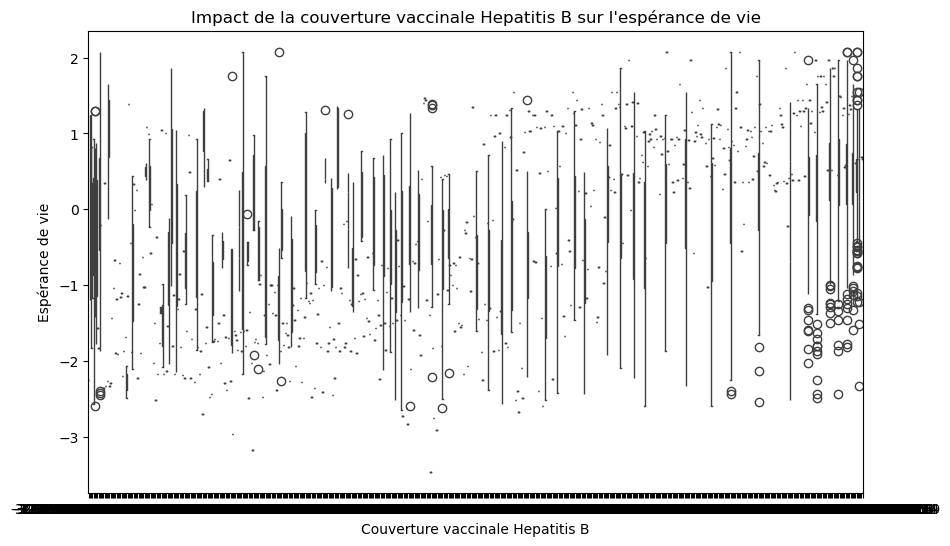

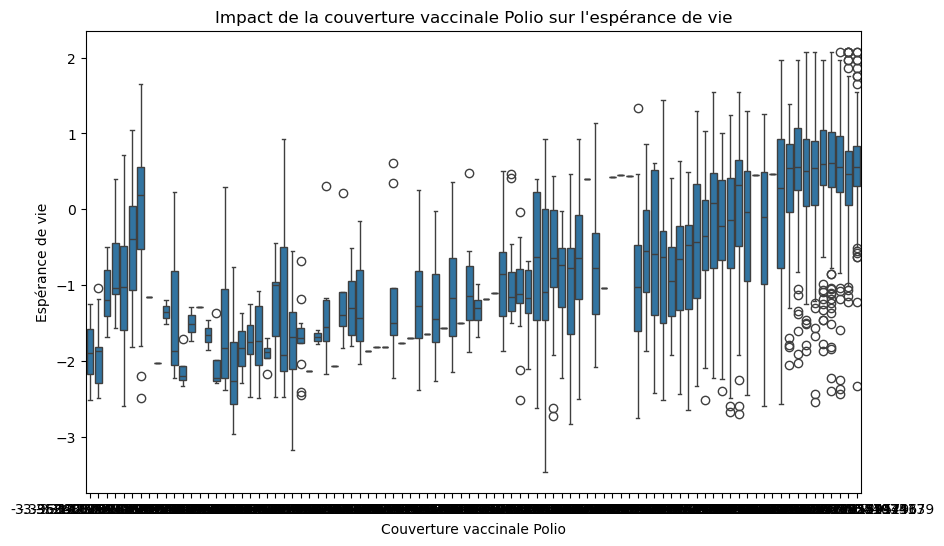

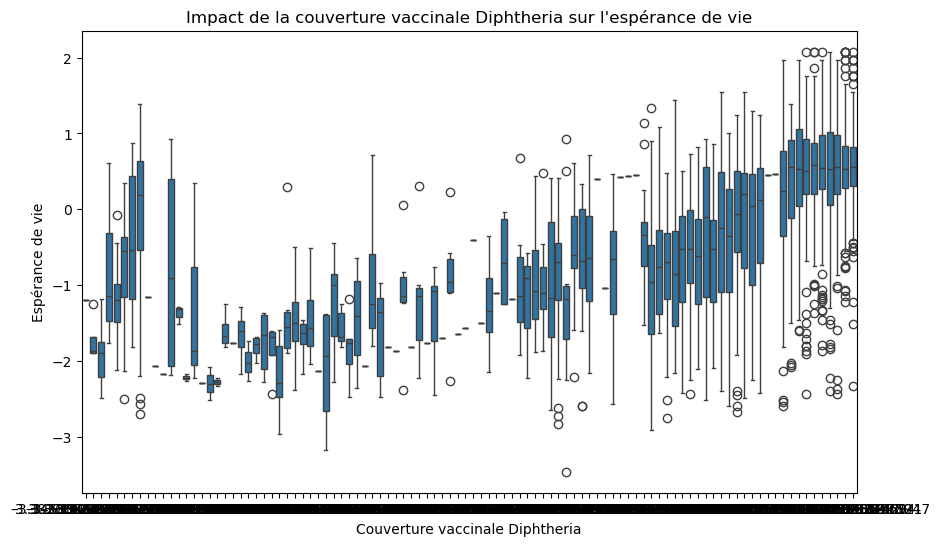

In [204]:
# Comparaison de la couverture vaccinale et de l'espérance de vie

data = df[["Hepatitis B", "Polio" , "Diphtheria"]]	
for col in data.columns :
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[col], y=df['Life expectancy'])
    plt.xlabel(f'Couverture vaccinale {col}')
    plt.ylabel('Espérance de vie')
    plt.title(f'Impact de la couverture vaccinale {col} sur l\'espérance de vie')
    plt.show()
